# Antenne Patch

![picture 2](../4802a341d7d2b52c18d1af409679c6f56a08eca58dba66e0a716840ed298abdb.png)  


Fréquence de résonance : $1.575Ghz$

Plage de fréquence : $1.555Ghz...1.595Ghz$ à -10dB

In [1]:
from scipy.constants import c, epsilon_0, mu_0
from scipy.optimize import fsolve, minimize, Bounds, least_squares
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, log, pi

## Calcul des valeurs

In [2]:
fr = 1.575e9 # 1.575 GHz
epsilon_r = np.array([4.3, 9.4])
h = 1.6e-3

$$W=\frac{1}{2f_r\sqrt{\epsilon_0\epsilon_r}}\sqrt{\frac{2}{\epsilon_r+1}}=\frac{c}{2f_r}\sqrt{\frac{2}{\epsilon_r+1}}$$

In [3]:
W = c/(2*fr)*sqrt(2/(epsilon_r + 1))
print(f"W = {W*1e3} mm")

W = [58.46382318 41.73577451] mm


$$\epsilon_{reff}=\frac{\epsilon_r+1}{2}+\frac{\epsilon_r-1}{2}\cdot \frac{1}{\sqrt{1+10\frac{h}{W}}}$$

In [4]:
epsilon_reff = (epsilon_r + 1) / 2 + (epsilon_r-1)/2 / sqrt(1+10*h/W)
print(f"epsilon_reff = {epsilon_reff}")

epsilon_reff = [4.11202529 8.77092748]


$$\Delta L=0.412h\frac{\epsilon_r+0.3}{\epsilon_r-0.258}\cdot \frac{\frac{W}{h}+0.264}{\frac{W}{h}+0.8}$$

In [5]:
DeltaL = 0.412 * h * (epsilon_r+0.3)/(epsilon_r-0.258) * (W/h + 0.264)/(W/h + 0.8)
print(f"DeltaL = {DeltaL*1e3} mm")

DeltaL = [0.73943399 0.68549101] mm


$$L=\frac{1}{2f_r\sqrt{\epsilon_e\mu_0}}\sqrt{\frac{1}{\epsilon_{reff}-2\Delta L}}$$

In [6]:
L = c/(2*fr) * sqrt(1/(epsilon_reff - 2*DeltaL))
print(f"L = {L*1e3} mm")

L = [46.94186829 32.13818407] mm


$$Z_{in}=\frac{60}{\sqrt{\epsilon_{reff}}}\ln\left(\frac{8h}{w_0}+\frac{w_0}{4h}\right)$$

Valable uniquement si $w_0<h$. Sinon il faut utiliser

$$Z_{in}=\frac{120\pi}{\sqrt{\epsilon_{reff}}}\left(\frac{w_0}{h}+1.393+0.667\ln\left(\frac{w_0}{h}+1.444\right)\right)$$

In [7]:
def Z_in(w0, epsilon_reff):
    if w0<=h:
        impedance = 60/sqrt(epsilon_reff) * log(8*h/w0 + w0/(4*h))
    else:
        impedance = 120*pi/sqrt(epsilon_reff)*(w0/h + 1.393 + 0.667*log(w0/h+1.444))
    return impedance

Z_in = np.vectorize(Z_in)

Z_in_FR4 = lambda x : Z_in(x, epsilon_reff[0])
Z_in_ceramic = lambda x : Z_in(x, epsilon_reff[1])

In [8]:
output_FR4 = least_squares(lambda x : Z_in_FR4(x)-50, (1), bounds=(0.0000001,100))
output_ceramic = least_squares(lambda x : Z_in_ceramic(x)-50, (1), bounds=(0.0000001,100))
w0 = np.array([output_FR4.x[0], output_ceramic.x[0]])
w1 = w0 / 3

In [9]:
print(f"w0 = {w0*1e3} mm")

w0 = [1.5999861  1.10092739] mm


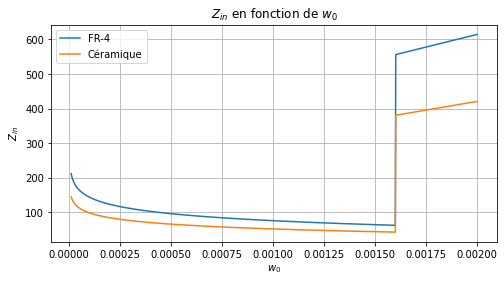

In [12]:
w0_range = np.linspace(0.01e-3, 2e-3, 1000)
Z_in_FR4_range = Z_in_FR4(w0_range)
Z_in_ceramic_range = Z_in_ceramic(w0_range)
plt.figure(figsize=(8,4))
plt.title('$Z_{in}$ en fonction de $w_0$')
plt.xlabel('$w_0$')
plt.ylabel('$Z_{in}$')
plt.plot(w0_range, Z_in_FR4_range, label="FR-4")
plt.plot(w0_range, Z_in_ceramic_range, label="Céramique")
plt.grid()
plt.legend()
plt.savefig('w0.png', dpi=300)
plt.show()

In [11]:
y0 = 10e-3
y1 = c/fr/8
print(f"Longueur y1 : {y1*1e3:.2f} mm")

Longueur y1 : 23.79 mm
